This code downloads historical stock data for TLT, computes log returns, and analyzes mean returns by calendar day of the month. It visualizes these mean returns to identify any calendar effects. The code also simulates a simple trading strategy of buying near month-end and selling at month-start. It evaluates the strategy's performance by aggregating and plotting returns over time. This analysis helps in identifying potential trading opportunities based on calendar effects.

In [1]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

Download historical stock data for TLT from Yahoo Finance

In [3]:
tlt = yf.download("TLT", start="2002-01-01", end="2025-04-30")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
tlt

Price,Close,High,Low,Open,Volume
Ticker,TLT,TLT,TLT,TLT,TLT
Date,,,,,
2002-07-30,37.748501,37.924465,37.748501,37.855006,6100
2002-07-31,38.216183,38.341210,37.924457,37.947608,29400
2002-08-01,38.433846,38.443105,38.220839,38.220839,25000
2002-08-02,38.827469,38.943234,38.378301,38.507961,52800
2002-08-05,38.998764,39.100637,38.827431,38.915413,61100
...,...,...,...,...,...
2025-04-23,86.999878,88.733497,86.850426,88.554156,44082200
2025-04-24,87.916504,88.026101,87.438268,87.707275,24190800


Compute log returns for the adjusted closing prices

In [5]:
price_type = "Close"
tlt["log_return"] = np.log(tlt[price_type] / tlt[price_type].shift(1))

Add a column indicating the day of the month for each data entry

In [6]:
tlt["day_of_month"] = tlt.index.day

Add a column indicating the year for each data entry

In [7]:
tlt["year"] = tlt.index.year

In [8]:
tlt['DoW'] = tlt.index.day_name()

In [9]:
tlt.head(3)

Price,Close,High,Low,Open,Volume,log_return,day_of_month,year,DoW
Ticker,TLT,TLT,TLT,TLT,TLT,,,,
Date,,,,,,,,,
2002-07-30,37.748501,37.924465,37.748501,37.855006,6100,NaN,30,2002,Tuesday
2002-07-31,38.216183,38.341210,37.924457,37.947608,29400,0.012313,31,2002,Wednesday
2002-08-01,38.433846,38.443105,38.220839,38.220839,25000,0.005679,1,2002,Thursday


Group the data by the day of the month and compute the mean log returns

In [10]:
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()

In [11]:
grouped_by_day

day_of_month
1    -0.000227
2    -0.000577
3    -0.000804
4     0.000460
5    -0.002372
6    -0.000627
7    -0.000407
8     0.000071
9    -0.000560
10   -0.001207
11    0.000489
12   -0.000145
13    0.000531
14   -0.000193
15    0.000832
16    0.001063
17    0.000669
18   -0.000424
19    0.000347
20    0.001186
21   -0.000955
22    0.001268
23    0.000770
24    0.000623
25    0.000025
26    0.000511
27    0.000339
28    0.000814
29    0.000251
30    0.001573
31    0.002424
Name: log_return, dtype: float64

<Axes: xlabel='day_of_month'>

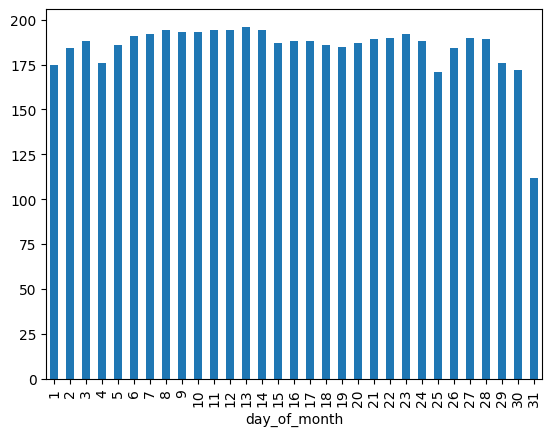

In [12]:
tlt.groupby("day_of_month").log_return.count().plot.bar()

Plot the mean log returns by calendar day of the month

<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

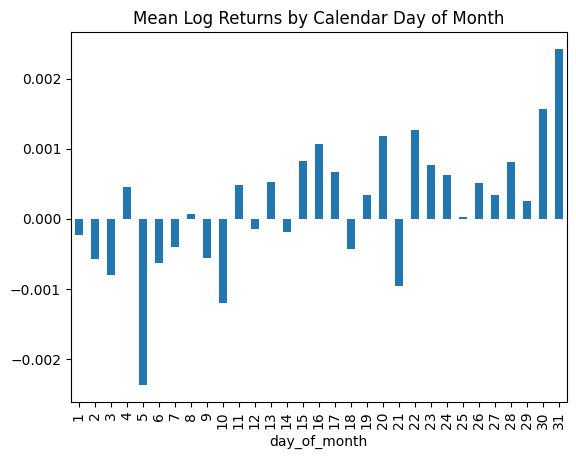

In [13]:
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

Initialize a simple trading strategy of buying before month-end and selling at month-start

Note: Given what is actually implemented below, I would say that the strategy is slightly different:
* buy on the 23rd, sell at the close on the last day of the month
* short-sell on the first day of the month, and cover on the 7th at end of day.

In [14]:
# Set initial returns for the first week of the month to zero
tlt["first_week_returns"] = 0.0

In [15]:
# Assign log returns to the first week of the month
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

In [16]:
# Set initial returns for the last week of the month to zero
tlt["last_week_returns"] = 0.0

In [17]:
# Assign log returns to the last week of the month
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return

In [18]:
tlt

Price,Close,High,Low,Open,Volume,log_return,day_of_month,year,DoW,first_week_returns,last_week_returns
Ticker,TLT,TLT,TLT,TLT,TLT,,,,,,
Date,,,,,,,,,,,
2002-07-30,37.748501,37.924465,37.748501,37.855006,6100,NaN,30,2002,Tuesday,0.000000,NaN
2002-07-31,38.216183,38.341210,37.924457,37.947608,29400,0.012313,31,2002,Wednesday,0.000000,0.012313
2002-08-01,38.433846,38.443105,38.220839,38.220839,25000,0.005679,1,2002,Thursday,0.005679,0.000000
2002-08-02,38.827469,38.943234,38.378301,38.507961,52800,0.010189,2,2002,Friday,0.010189,0.000000
2002-08-05,38.998764,39.100637,38.827431,38.915413,61100,0.004402,5,2002,Monday,0.004402,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,86.999878,88.733497,86.850426,88.554156,44082200,0.009666,23,2025,Wednesday,0.000000,0.009666
2025-04-24,87.916504,88.026101,87.438268,87.707275,24190800,0.010481,24,2025,Thursday,0.000000,0.010481


Compute the difference between last week returns and first week returns to simulate the strategy

In [19]:
tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

In [20]:
tlt

Price,Close,High,Low,Open,Volume,log_return,day_of_month,year,DoW,first_week_returns,last_week_returns,last_week_less_first_week
Ticker,TLT,TLT,TLT,TLT,TLT,,,,,,,
Date,,,,,,,,,,,,
2002-07-30,37.748501,37.924465,37.748501,37.855006,6100,NaN,30,2002,Tuesday,0.000000,NaN,NaN
2002-07-31,38.216183,38.341210,37.924457,37.947608,29400,0.012313,31,2002,Wednesday,0.000000,0.012313,0.012313
2002-08-01,38.433846,38.443105,38.220839,38.220839,25000,0.005679,1,2002,Thursday,0.005679,0.000000,-0.005679
2002-08-02,38.827469,38.943234,38.378301,38.507961,52800,0.010189,2,2002,Friday,0.010189,0.000000,-0.010189
2002-08-05,38.998764,39.100637,38.827431,38.915413,61100,0.004402,5,2002,Monday,0.004402,0.000000,-0.004402
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,86.999878,88.733497,86.850426,88.554156,44082200,0.009666,23,2025,Wednesday,0.000000,0.009666,0.009666
2025-04-24,87.916504,88.026101,87.438268,87.707275,24190800,0.010481,24,2025,Thursday,0.000000,0.010481,0.010481


Group the data by year and plot the mean returns of the strategy for each year

<Axes: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

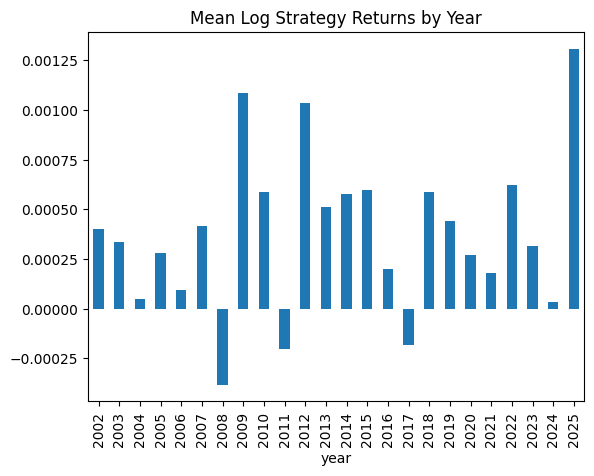

In [21]:
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

Group the data by year, compute cumulative sum of returns, and plot it

<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

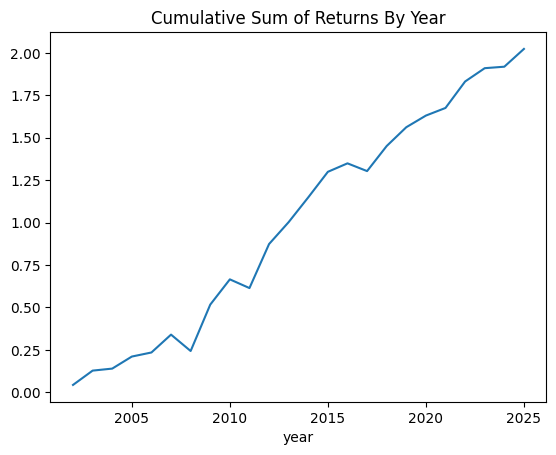

In [22]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

Compute and plot the cumulative sum of returns by day

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

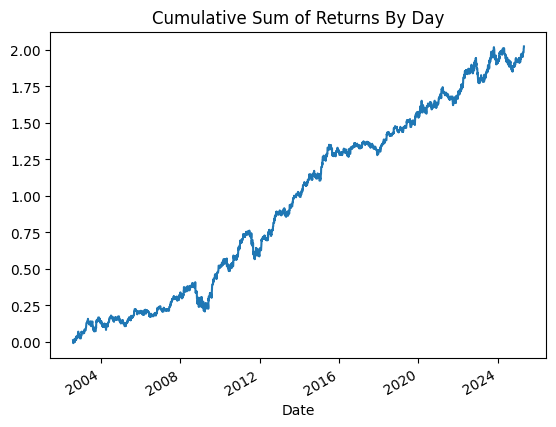

In [32]:
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")